# 画出时间

In [2]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd

base_path = r'D:\Project\Convert_Dataset\fusiondata\filter_ADSB'
adsb_contents = ['20220701_1.txt', '20220701_2.txt', '20220701_3.txt', '20220701_4.txt',
                 '20220703_1.txt', '20220703_2.txt', '20220703_4.txt',
                 '20220704_1.txt', '20220704_2.txt', '20220704_3.txt', '20220704_4.txt',
                 '20220706_1.txt', '20220706_2.txt', '20220706_3.txt', '20220706_4.txt',
                 '20220708_1.txt', '20220708_2.txt', '20220708_4.txt',
                 '20220710_1.txt', '20220710_2.txt', '20220710_4.txt', 
                 '20220711_1.txt', '20220711_2.txt', '20220711_4.txt', 
                 '20220713_2.txt', 
                 '20220715_2.txt', 
                 '20220718_4.txt', 
                 '20220719_2.txt', 
                 '20220720_2.txt',
                 '20220724_4.txt']
print("ADSB文件个数为：", len(adsb_contents))

ADSB文件个数为： 30


In [3]:
adsb_path = os.path.join(base_path, adsb_contents[1])
print(adsb_path)

D:\Project\Convert_Dataset\fusiondata\filter_ADSB\20220701_2.txt


In [4]:
with open(adsb_path, 'r', encoding='utf-8') as file:
    # 读取整个文件内容
    data_content = file.read()
# 解析JSON数组
data_array = json.loads(data_content)

In [5]:
data_array

[{'LATH': '46.8071275949',
  'TRP': 27454.2344,
  'LONH': '89.5134043694',
  'ADDR': '780CE8',
  'LON': 89.5134043694,
  'LAT': 46.8071275949,
  'GH': None,
  'LON_new': 0.010965369400011582,
  'LAT_new': 0.008663535100005504,
  'TRP_new': 0.0},
 {'LATH': '46.8071383238',
  'TRP': 27457.3438,
  'LONH': '89.5134687424',
  'ADDR': '780CE8',
  'LON': 89.5134687424,
  'LAT': 46.8071383238,
  'GH': None,
  'LON_new': 0.0110297423999981,
  'LAT_new': 0.00867426399999971,
  'TRP_new': 3.1093999999975495},
 {'LATH': '46.8071383238',
  'TRP': 27458.3438,
  'LONH': '89.5134902',
  'ADDR': '780CE8',
  'LON': 89.5134902,
  'LAT': 46.8071383238,
  'GH': None,
  'LON_new': 0.011051200000011363,
  'LAT_new': 0.00867426399999971,
  'TRP_new': 4.1093999999975495},
 {'LATH': '46.8071490526',
  'TRP': 27458.8125,
  'LONH': '89.5134902',
  'ADDR': '780CE8',
  'LON': 89.5134902,
  'LAT': 46.8071490526,
  'GH': None,
  'LON_new': 0.011051200000011363,
  'LAT_new': 0.008684992800006341,
  'TRP_new': 4.578099

In [6]:
trp_values = [float(record['TRP']) for record in data_array]

df = pd.DataFrame({'TRP': trp_values})
file_name = '{}.xlsx'.format(adsb_contents[1])
folder_path = r'D:\Project\Convert_Dataset\TRP_values'
df.to_excel(os.path.join(folder_path, file_name), index=False)

27454.2344
27457.3438
27458.3438
27458.8125
27461.3047
27461.875
27462.3906
27462.9219
27463.4844
27464.3281
27464.9141
27465.4688
27466.8828
27467.3984
27468.4141
27470.9844
27472.375
27472.8984
27474.4219
27474.8906
27475.3438
27475.7422
27476.3047
27476.8125
27477.3359
27477.8906
27478.3516
27478.8359
27479.3594
27480.2656
27482.2031
27483.625
27484.6719
27486.8984
27487.3203
27488.7812
27493.8828
27499.7344
27500.1562
27501.8516
27508.5938
27509.625
27510.9766
27514.1797
27514.6328
27515.2031
27515.7344
27517.2969
27518.2031
27519.0469
27519.4609
27520.4609
27520.9766
27522.0312
27523.0156
27523.4922
27524.0156
27524.4844
27525.4219
27525.9531
27526.4766
27526.9531
27527.3828
27528.4844
27528.9141
27529.8438
27530.8125
27531.2812
27531.7344
27532.3125
27532.8438
27533.25
27533.6562
27534.6172
27535.1641
27536.2344
27537.6172
27538.5312
27539.6172
27540.1875
27540.6016
27542.6172
27543.125
27543.5938
27544.4609
27544.9141
27545.3125
27545.7734
27546.2812
27546.7422
27547.3203
27547.

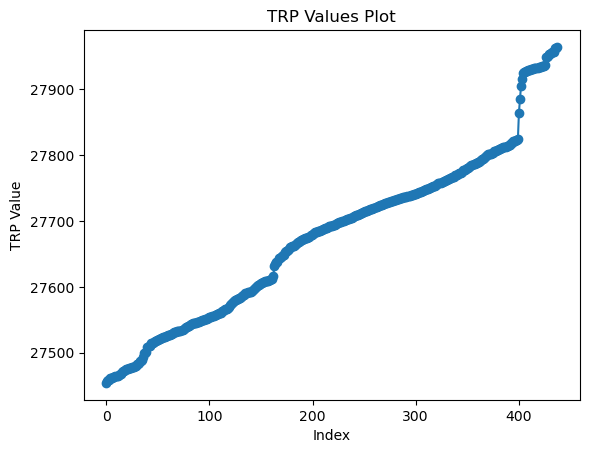

In [7]:
# 打印TRP的值，并把它们画出来
for trp in trp_values:
    print(trp)
print(f'Total number of TRP values: {len(trp_values)}')

# 绘制 TRP 值
plt.plot(trp_values, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('TRP Value')
plt.title('TRP Values Plot')
plt.show()

In [8]:
# 初始化一个变量来保存前一个 TRP 值
prev_trp = None
# 初始化一个变量来跟踪当前的迭代索引
index = 0

# 计算并打印相邻 TRP 值之间的差
for trp in trp_values:
    if prev_trp is not None:
        diff = trp - prev_trp
        print(f'Difference between TRP value at index {index} ({trp}) and TRP value at index {index - 1} ({prev_trp}) is: {diff}')
    prev_trp = trp
    index += 1

Difference between TRP value at index 1 (27457.3438) and TRP value at index 0 (27454.2344) is: 3.1093999999975495
Difference between TRP value at index 2 (27458.3438) and TRP value at index 1 (27457.3438) is: 1.0
Difference between TRP value at index 3 (27458.8125) and TRP value at index 2 (27458.3438) is: 0.4687000000012631
Difference between TRP value at index 4 (27461.3047) and TRP value at index 3 (27458.8125) is: 2.4922000000005937
Difference between TRP value at index 5 (27461.875) and TRP value at index 4 (27461.3047) is: 0.5702999999994063
Difference between TRP value at index 6 (27462.3906) and TRP value at index 5 (27461.875) is: 0.5155999999988126
Difference between TRP value at index 7 (27462.9219) and TRP value at index 6 (27462.3906) is: 0.5313000000023749
Difference between TRP value at index 8 (27463.4844) and TRP value at index 7 (27462.9219) is: 0.5625
Difference between TRP value at index 9 (27464.3281) and TRP value at index 8 (27463.4844) is: 0.8436999999976251
Dif

In [31]:
import numpy as np
base_path = r'D:\Project\Convert_Dataset\fusiondata\filter_ADSB'
adsb_contents = ['20220701_1.txt', '20220701_2.txt', '20220701_3.txt', '20220701_4.txt',
                 '20220703_1.txt', '20220703_2.txt', '20220703_3.txt', '20220703_4.txt',
                 '20220704_1.txt', '20220704_2.txt', '20220704_3.txt', '20220704_4.txt',
                 '20220706_1.txt', '20220706_2.txt', '20220706_3.txt', '20220706_4.txt',
                 '20220708_1.txt', '20220708_2.txt', '20220708_3.txt', '20220708_4.txt',
                 '20220710_1.txt', '20220710_2.txt', '20220710_4.txt', 
                 '20220711_1.txt', '20220711_2.txt', '20220711_4.txt', 
                 '20220713_2.txt', 
                 '20220715_1.txt', '20220715_2.txt', 
                 '20220718_4.txt', 
                 '20220719_2.txt', 
                 '20220720_2.txt',
                 '20220724_4.txt', 
                 '20220729_2.txt']

adsb_path = os.path.join(base_path, adsb_contents[3])
with open(adsb_path, 'r', encoding='utf-8') as file:
    # 读取整个文件内容
    data_content = file.read()

# 解析JSON数组
data_array = json.loads(data_content)
# data_array

In [32]:
# 初始化一个列表来存储提取的数据
extracted_data = []

# 遍历数据数组并每8个记录进行分组
# 遍历数据数组并每8个记录进行分组
for i in range(0, len(data_array), 8):
    group = data_array[i:i+8]  # 获取当前分组的记录
    group_data = np.zeros((8, 1, 2))  # 初始化一个形状为 (8, 2) 的数组，因为我们只需要经纬度

    for j, record in enumerate(group):
        # 提取 TRP, LAT 和 LON 值，并存储到数组中
        group_data[j, 0, 0] = record['LAT']
        group_data[j, 0, 1] = record['LON']

    # 将当前分组的数据添加到列表中
    extracted_data.append(group_data)

In [37]:
# 确保 extracted_data 列表中的所有元素都是 NumPy 数组
# 合并列表中的所有数组为一个数组
combined_array = np.stack(extracted_data)

# 现在 combined_array 是一个 NumPy 数组，我们可以查看它的形状
print(f"Combined array has shape: {combined_array.shape}")

file_name = r'D:\Project\Convert_Dataset\AdsbTraces_data\test.npy'
np.save(file_name, combined_array)
print(f"Array saved to {file_name}")

Combined array has shape: (36, 8, 1, 2)
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\test.npy


In [38]:
# 现在 extracted_data 包含了所有分组的数据
for data in extracted_data:
    print(data)

[[[46.80625856 89.51387644]]

 [[46.80612445 89.51377988]]

 [[46.80610299 89.51375842]]

 [[46.8060708  89.51372623]]

 [[46.80604935 89.51370478]]

 [[46.80601716 89.51369405]]

 [[46.8059957  89.5136565 ]]

 [[46.80590451 89.51358676]]]
[[[46.80588305 89.51357067]]

 [[46.80580795 89.51350629]]

 [[46.80577576 89.51348484]]

 [[46.80574358 89.51345801]]

 [[46.80570602 89.51344192]]

 [[46.80566847 89.513399  ]]

 [[46.8056041  89.51334   ]]

 [[46.80554509 89.51329708]]]
[[[46.80550218 89.51325417]]

 [[46.80545926 89.51322734]]

 [[46.80542707 89.51319516]]

 [[46.80538416 89.51315761]]

 [[46.80531979 89.51310933]]

 [[46.80525005 89.51303959]]

 [[46.80520713 89.5130074 ]]

 [[46.8051213  89.51295376]]]
[[[46.80509984 89.51292157]]

 [[46.80504084 89.51286793]]

 [[46.80499792 89.51283574]]

 [[46.80491745 89.51277137]]

 [[46.80488527 89.51273918]]

 [[46.80484772 89.51271236]]

 [[46.80475652 89.51263726]]

 [[46.80464387 89.51253533]]]
[[[46.80442393 89.51236904]]

 [[46.8044

# 轨迹数据保存

In [3]:
import os
import json
import numpy as np

base_path = r'D:\Project\Convert_Dataset\fusiondata\filter_ADSB'
adsb_traces_path = r'D:\Project\Convert_Dataset\AdsbTraces_data'
adsb_contents = ['20220701_1.txt', '20220701_2.txt', '20220701_3.txt', '20220701_4.txt',
                 '20220703_1.txt', '20220703_2.txt', '20220703_4.txt',
                 '20220704_1.txt', '20220704_2.txt', '20220704_3.txt', '20220704_4.txt',
                 '20220706_1.txt', '20220706_2.txt', '20220706_3.txt', '20220706_4.txt',
                 '20220708_1.txt', '20220708_2.txt', '20220708_4.txt',
                 '20220710_1.txt', '20220710_2.txt', '20220710_4.txt', 
                 '20220711_1.txt', '20220711_2.txt', '20220711_4.txt', 
                 '20220713_2.txt', 
                 '20220715_2.txt', 
                 '20220718_4.txt', 
                 '20220719_2.txt', 
                 '20220720_2.txt',
                 '20220724_4.txt']

# 确保保存路径存在
if not os.path.exists(adsb_traces_path):
    os.makedirs(adsb_traces_path)

# 遍历文件名列表
for file_name in adsb_contents:
    # 构建完整的文件路径
    adsb_path = os.path.join(base_path, file_name)
    
    # 读取文件内容
    with open(adsb_path, 'r', encoding='utf-8') as file:
        data_content = file.read()
    
    # 解析JSON数组
    data_array = json.loads(data_content)
    
    # 初始化一个列表来存储提取的数据
    extracted_data = []

    # 遍历数据数组并每8个记录进行分组
    for i in range(0, len(data_array), 7):
        group = data_array[i:i+7]  # 获取当前分组的记录
        group_data = np.zeros((7, 1, 2))  # 初始化一个形状为 (8, 1, 2) 的数组
        
        for j, record in enumerate(group):
            # 提取 LAT 和 LON 值，并存储到数组中
            group_data[j, 0, 0] = record['LAT']
            group_data[j, 0, 1] = record['LON']
        
        # 将当前分组的数据添加到列表中
        extracted_data.append(group_data)
    
    # 合并列表中的所有数组为一个数组
    combined_array = np.stack(extracted_data)
    
    # 构建保存的文件路径
    save_path = os.path.join(adsb_traces_path, f'{file_name[:-4]}.npy')
    
    # 保存数组到 .npy 文件
    np.save(save_path, combined_array)
    
    print(f"Array saved to {save_path}")

Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220701_1.npy
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220701_2.npy
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220701_3.npy
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220701_4.npy
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220703_1.npy
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220703_2.npy
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220703_4.npy
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220704_1.npy
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220704_2.npy
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220704_3.npy
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220704_4.npy
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220706_1.npy
Array saved to D:\Project\Convert_Dataset\AdsbTraces_data\20220706_2.npy
Array saved to D:\Project\Convert_Dataset\AdsbTrace

# AdsbTraces_data文件夹的轨迹预测数据读取

In [4]:
import numpy as np
import os

# 文件夹路径，包含 .npy 文件
folder_path = r'D:\Project\Convert_Dataset\AdsbTraces_data'

# 确保文件夹路径存在
if not os.path.exists(folder_path):
    print(f"The folder {folder_path} does not exist.")
else:
    # 获取文件夹中所有的 .npy 文件
    npy_files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]

    # 遍历所有 .npy 文件
    for file_name in npy_files:
        # 构建完整的文件路径
        file_path = os.path.join(folder_path, file_name)
        
        # 加载 .npy 文件中的数据
        data = np.load(file_path)
        
        # 打印数据的形状
        print(f"The shape of {file_name} is: {data.shape}")

The shape of 20220701_1.npy is: (38, 7, 1, 2)
The shape of 20220701_2.npy is: (63, 7, 1, 2)
The shape of 20220701_3.npy is: (24, 7, 1, 2)
The shape of 20220701_4.npy is: (41, 7, 1, 2)
The shape of 20220703_1.npy is: (26, 7, 1, 2)
The shape of 20220703_2.npy is: (39, 7, 1, 2)
The shape of 20220703_4.npy is: (52, 7, 1, 2)
The shape of 20220704_1.npy is: (7, 7, 1, 2)
The shape of 20220704_2.npy is: (33, 7, 1, 2)
The shape of 20220704_3.npy is: (15, 7, 1, 2)
The shape of 20220704_4.npy is: (39, 7, 1, 2)
The shape of 20220706_1.npy is: (23, 7, 1, 2)
The shape of 20220706_2.npy is: (50, 7, 1, 2)
The shape of 20220706_3.npy is: (21, 7, 1, 2)
The shape of 20220706_4.npy is: (39, 7, 1, 2)
The shape of 20220708_1.npy is: (13, 7, 1, 2)
The shape of 20220708_2.npy is: (32, 7, 1, 2)
The shape of 20220708_4.npy is: (48, 7, 1, 2)
The shape of 20220710_1.npy is: (8, 7, 1, 2)
The shape of 20220710_2.npy is: (31, 7, 1, 2)
The shape of 20220710_4.npy is: (46, 7, 1, 2)
The shape of 20220711_1.npy is: (12,

In [2]:
import os
import pandas as pd

# 文件夹路径
folder_path = r'D:\Project\Convert_Dataset\interpolated_sampled_ADSB\TRP_values'

# 存储结果的字典
result_dict = {}

# 遍历文件夹中的所有.xlsx文件
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        # 读取Excel文件
        df = pd.read_excel(file_path)
        # 计算TRP_Difference列中值大于15的行数
        count_gt_15 = len(df[df['TRP_Difference'] > 15])
        # 将结果存储到字典中
        result_dict[filename] = count_gt_15

# 打印结果
for filename, count in result_dict.items():
    print(f"{filename}: {count} 个大于15的TRP_Difference values")


20220701_1.xlsx: 1 个大于15的TRP_Difference values
20220701_2.xlsx: 4 个大于15的TRP_Difference values
20220701_3.xlsx: 1 个大于15的TRP_Difference values
20220701_4.xlsx: 1 个大于15的TRP_Difference values
20220703_1.xlsx: 0 个大于15的TRP_Difference values
20220703_2.xlsx: 1 个大于15的TRP_Difference values
20220703_4.xlsx: 0 个大于15的TRP_Difference values
20220704_1.xlsx: 0 个大于15的TRP_Difference values
20220704_2.xlsx: 0 个大于15的TRP_Difference values
20220704_3.xlsx: 0 个大于15的TRP_Difference values
20220704_4.xlsx: 2 个大于15的TRP_Difference values
20220706_1.xlsx: 2 个大于15的TRP_Difference values
20220706_2.xlsx: 0 个大于15的TRP_Difference values
20220706_3.xlsx: 1 个大于15的TRP_Difference values
20220706_4.xlsx: 0 个大于15的TRP_Difference values
20220708_1.xlsx: 2 个大于15的TRP_Difference values
20220708_2.xlsx: 0 个大于15的TRP_Difference values
20220708_4.xlsx: 1 个大于15的TRP_Difference values
20220710_1.xlsx: 0 个大于15的TRP_Difference values
20220710_2.xlsx: 0 个大于15的TRP_Difference values
20220710_4.xlsx: 0 个大于15的TRP_Difference values
20220711_1.xl